<a href="https://colab.research.google.com/github/aureavaleria/DataBalancing-Research/blob/main/smote/explorando-imbalanced-learn/Exemplo_B%C3%A1sico_de_SMOTE_com_imbalanced_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo Básico de SMOTE com imbalanced-learn

Este notebook demonstra, passo a passo, como identificar desbalanceamento em conjuntos de dados, aplicar a técnica SMOTE utilizando a biblioteca `imbalanced-learn` e visualizar os resultados antes e depois do balanceamento.  
O objetivo é te ajudar a entender o funcionamento do SMOTE na prática, com um exemplo simples e visual.

SMOTE é uma técnica de oversampling que **cria exemplos sintéticos da classe minoritária** para tornar o conjunto de dados mais equilibrado, facilitando o aprendizado dos modelos de machine learning.

**1. Importando bibliotecas necessárias**

In [6]:
# Nesta célula, vamos importar as bibliotecas que serão usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification    # Gerar dados sintéticos
from imblearn.over_sampling import SMOTE            # Técnica de oversampling


**2. Gerando um conjunto de dados desbalanceado**

In [7]:
# Vamos criar um conjunto de dados sintético com apenas 2 features (para facilitar a visualização)
# e um desbalanceamento intencional entre as classes (85% de uma, 15% de outra)

X, y = make_classification(n_samples=300,         # Total de amostras
                           n_features=2,          # Só 2 features (dimensões)
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.85, 0.15],  # 85% de uma classe, 15% de outra
                           random_state=42)

# Conferindo a proporção original das classes
unique, counts = np.unique(y, return_counts=True)
print(f"Distribuição das classes antes do SMOTE: {dict(zip(unique, counts))}")


Distribuição das classes antes do SMOTE: {np.int64(0): np.int64(255), np.int64(1): np.int64(45)}


**Explicação:**

Neste passo, geramos um conjunto de dados artificial para simular um problema real de desbalanceamento.
A maioria dos pontos pertence à classe 0 e poucos à classe 1 (minoritária).

**3. Visualizando o desbalanceamento inicial**

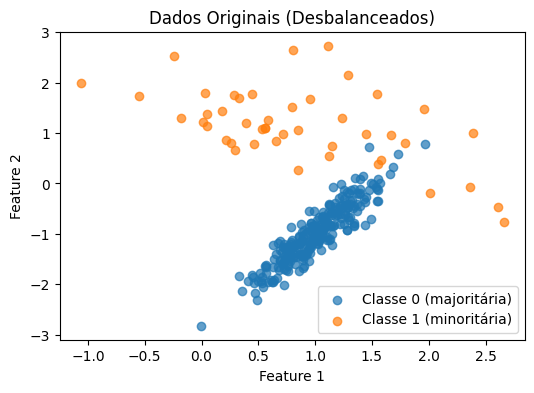

In [8]:
# Visualizando como os dados estão distribuídos originalmente
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Classe 0 (majoritária)', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Classe 1 (minoritária)', alpha=0.7)
plt.title('Dados Originais (Desbalanceados)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Explicação:
Aqui, vemos no gráfico que a classe 1 está representada por poucos pontos (azul) e a classe 0 por muitos pontos (laranja/vermelho, dependendo da configuração do seu matplotlib).
É esse desbalanceamento que dificulta o aprendizado dos modelos.

**4. Aplicando o SMOTE**

In [9]:
# Agora, vamos aplicar o SMOTE para gerar exemplos sintéticos da classe minoritária

smote = SMOTE(random_state=42)   # Inicializando o SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)  # Aplicando o método

# Conferindo a nova proporção das classes após SMOTE
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print(f"Distribuição das classes após SMOTE: {dict(zip(unique_resampled, counts_resampled))}")

Distribuição das classes após SMOTE: {np.int64(0): np.int64(255), np.int64(1): np.int64(255)}


**Explicação:**

O SMOTE cria novas amostras só para a **classe minoritária, fazendo interpolação entre os pontos reais existentes.**
Assim, o conjunto de dados fica balanceado e pronto para modelagem.

**5. Visualizando o resultado do SMOTE**

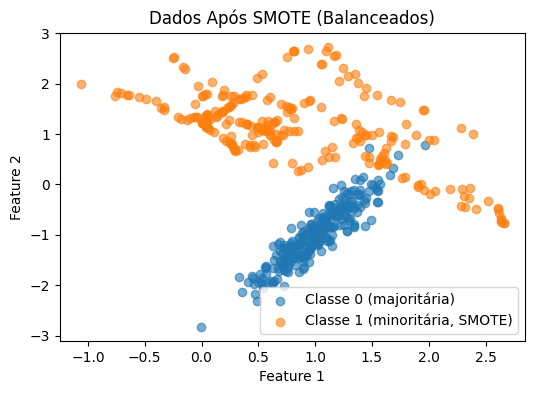

In [10]:
# Visualizando o resultado do balanceamento após SMOTE
plt.figure(figsize=(6, 4))
plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1],
            label='Classe 0 (majoritária)', alpha=0.6)
plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1],
            label='Classe 1 (minoritária, SMOTE)', alpha=0.6)
plt.title('Dados Após SMOTE (Balanceados)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Explicação:

Agora podemos ver que a quantidade de pontos das duas classes está igualada no gráfico, e os exemplos sintéticos da classe minoritária foram "espalhados" entre os exemplos reais existentes, preenchendo o espaço vazio do gráfico.